<a href="https://colab.research.google.com/github/senriquez2/Final-Project/blob/main/Histogram_Violin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy import stats

In [10]:
import pandas as pd


# This URL should be the one you get after clicking the "Raw" button on GitHub.
github_raw_url = 'https://raw.githubusercontent.com/senriquez2/Final-Project/refs/heads/main/Data_Final.csv'

# Load the file. Since your file is a CSV/Excel hybrid, we use read_csv.
df = pd.read_csv(github_raw_url)

# Display the first few rows to confirm the data loaded successfully.
print("Data loaded directly from GitHub.")
print(df.head())

Data loaded directly from GitHub.
   Alpha A30P_day_1_1   Alpha A30P_day_1_2   Alpha A30P_day_10_1  \
0             0.64586              0.48337              0.388650   
1             0.28048              0.19605              0.283160   
2             0.25264                  NaN              0.218570   
3             0.48701              0.33366              0.302310   
4             1.56800              0.25721              0.086271   

    Alpha A30P_day_10_2   Alpha A53T_day_1_1   Alpha A53T_day_1_2  \
0               0.36612              0.50280                  NaN   
1               0.22931              0.43895                  NaN   
2               0.41160              0.36425                  NaN   
3               0.24266              0.57274              0.41855   
4               1.12850                  NaN                  NaN   

    Alpha A53T_day_10_1   Alpha A53T_day_10_2   Alpha A53T_day_30_1  \
0               0.36247               0.26078                   NaN   


In [11]:
#file_path = 'Data_Final.xlsx'

#df = pd.read_excel(file_path)

# Verify it loaded
#print(df.head())

In [12]:
df.columns = df.columns.str.strip()

# Rename columns to standard format
rename_map = {
    'Alpha _day_1_1': 'WT_day_1_1', 'Alpha _day_1_2': 'WT_day_1_2',
    'Alpha _day_10_1': 'WT_day_10_1', 'Alpha _day_10_2': 'WT_day_10_2',
    'Alpha _day_30_1': 'WT_day_30_1', 'Alpha _day_30_2': 'WT_day_30_2',
    'Alpha A30P_day_1_1': 'A30P_day_1_1', 'Alpha A30P_day_1_2': 'A30P_day_1_2',
    'Alpha A30P_day_10_1': 'A30P_day_10_1', 'Alpha A30P_day_10_2': 'A30P_day_10_2',
    'Alpha A53T_day_1_1': 'A53T_day_1_1', 'Alpha A53T_day_1_2': 'A53T_day_1_2',
    'Alpha A53T_day_10_1': 'A53T_day_10_1', 'Alpha A53T_day_10_2': 'A53T_day_10_2',
    'Alpha A53T_day_30_1': 'A53T_day_30_1', 'Alpha A53T_day_30_2': 'A53T_day_30_2'
}


In [13]:
# Initialize df_clean by renaming columns from the existing df DataFrame
df_clean = df.rename(columns=rename_map)

cols_to_keep = ['Gene names'] + list(rename_map.values())
valid_cols = [c for c in cols_to_keep if c in df_clean.columns]
df_clean = df_clean[valid_cols]

In [14]:
# Clean Rows
# Reset the index to make 'Gene names' a column again for processing
df_clean = df_clean.reset_index()
df_clean = df_clean.dropna(subset=['Gene names'])
df_clean['Gene names'] = df_clean['Gene names'].astype(str)
df_clean = df_clean.groupby('Gene names').sum()
df_clean = df_clean.replace(0, np.nan)

df_clean.head()

,index,WT_day_1_1,WT_day_1_2,WT_day_10_1,WT_day_10_2,WT_day_30_1,WT_day_30_2,A30P_day_1_1,A30P_day_1_2,A30P_day_10_1,A30P_day_10_2,A53T_day_1_1,A53T_day_1_2,A53T_day_10_1,A53T_day_10_2,A53T_day_30_1,A53T_day_30_2
Gene names,,,,,,,,,,,,,,,,,
1-Dec,687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.19518,NaN,NaN,NaN,NaN,NaN,0.17726,NaN
1-Sep,736,NaN,2.0627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.56901,NaN,NaN,NaN,NaN,NaN
128up,4141,0.19007,0.2586,0.41181,0.41889,0.41682,0.49062,0.23636,0.21182,0.42030,0.49645,0.16420,0.26593,0.52574,0.25381,0.53507,NaN
14-3-3epsilon,5500,0.98466,1.0520,3.94390,1.16300,1.37940,1.36620,1.09220,0.99455,1.40320,1.47970,1.13360,0.99546,1.31520,1.30170,1.21360,1.06760
14-3-3zeta,9310,3.30840,3.5715,3.30790,3.45951,3.68360,3.40629,3.62450,3.67550,3.57980,3.52940,3.34580,3.24323,3.68670,3.63550,3.14002,3.07457


In [15]:
df_log = np.log2(df_clean)

df_log.head()

,index,WT_day_1_1,WT_day_1_2,WT_day_10_1,WT_day_10_2,WT_day_30_1,WT_day_30_2,A30P_day_1_1,A30P_day_1_2,A30P_day_10_1,A30P_day_10_2,A53T_day_1_1,A53T_day_1_2,A53T_day_10_1,A53T_day_10_2,A53T_day_30_1,A53T_day_30_2
Gene names,,,,,,,,,,,,,,,,,
1-Dec,9.424166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.357123,NaN,NaN,NaN,NaN,NaN,-2.496061,NaN
1-Sep,9.523562,NaN,1.044534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.813474,NaN,NaN,NaN,NaN,NaN
128up,12.015763,-2.395397,-1.951206,-1.279949,-1.255357,-1.262504,-1.027322,-2.080942,-2.239089,-1.250509,-1.010280,-2.606474,-1.910882,-0.927579,-1.978179,-0.902200,NaN
14-3-3epsilon,12.425216,-0.022302,0.073135,1.979623,0.217851,0.464041,0.450169,0.127237,-0.007884,0.488721,0.565305,0.180912,-0.006565,0.395282,0.380397,0.279293,0.094371
14-3-3zeta,13.184565,1.726134,1.836530,1.725916,1.790568,1.881116,1.768201,1.857782,1.877941,1.839879,1.819423,1.742351,1.697431,1.882330,1.862154,1.650774,1.620385


Data Loaded and Log2 Transformed.


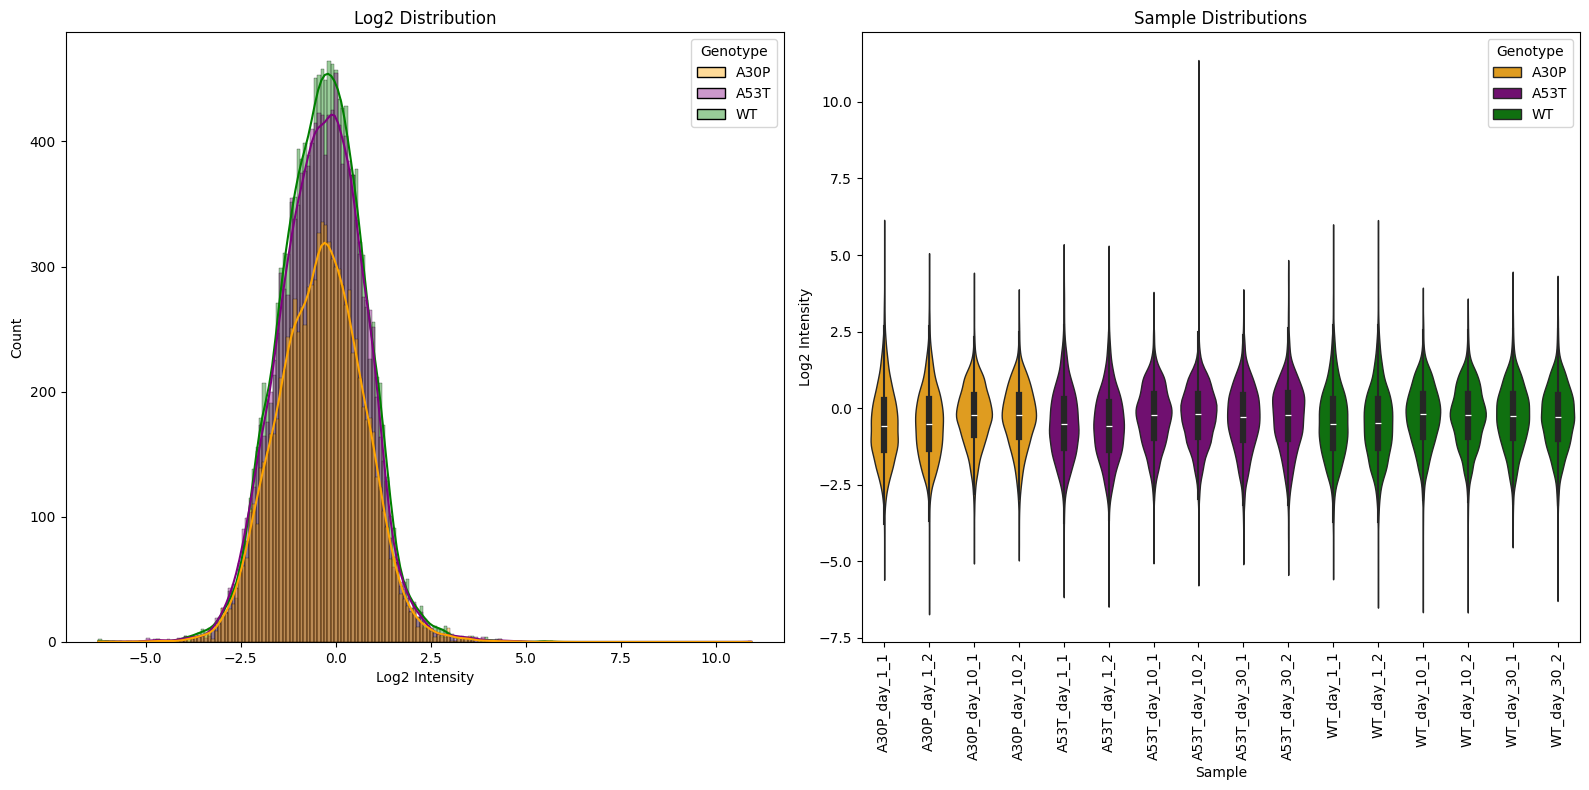

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. LOAD
# The file was originally loaded from a GitHub raw URL as CSV.
# We will use that URL here to ensure the data is loaded correctly.
github_raw_url = 'https://raw.githubusercontent.com/senriquez2/Final-Project/refs/heads/main/Data_Final.csv'
df = pd.read_csv(github_raw_url)

# Strip whitespace from all column names first
df.columns = df.columns.str.strip()

# 2. SETUP (Crucial Step: Move Gene names to index)
# If we don't do this, the Log2 math will try to transform the text and crash.
if 'Gene names' in df.columns:
    df = df.set_index('Gene names')

# Define the rename map locally to ensure this cell is self-contained
rename_map = {
    'Alpha _day_1_1': 'WT_day_1_1', 'Alpha _day_1_2': 'WT_day_1_2',
    'Alpha _day_10_1': 'WT_day_10_1', 'Alpha _day_10_2': 'WT_day_10_2',
    'Alpha _day_30_1': 'WT_day_30_1', 'Alpha _day_30_2': 'WT_day_30_2',
    'Alpha A30P_day_1_1': 'A30P_day_1_1', 'Alpha A30P_day_1_2': 'A30P_day_1_2',
    'Alpha A30P_day_10_1': 'A30P_day_10_1', 'Alpha A30P_day_10_2': 'A30P_day_10_2',
    'Alpha A53T_day_1_1': 'A53T_day_1_1', 'Alpha A53T_day_1_2': 'A53T_day_1_2',
    'Alpha A53T_day_10_1': 'A53T_day_10_1', 'Alpha A53T_day_10_2': 'A53T_day_10_2',
    'Alpha A53T_day_30_1': 'A53T_day_30_1', 'Alpha A53T_day_30_2': 'A53T_day_30_2'
}
# Apply the renaming to the DataFrame columns
df = df.rename(columns=rename_map)

# 3. TRANSFORM (The Missing Step)
# We replace 0 with NaN to avoid math errors, fill gaps, then Log2.
df = df.replace(0, np.nan)
min_val = df.min().min()
df_log2 = np.log2(df.fillna(min_val))

print("Data Loaded and Log2 Transformed.")

# 4. PLOT (This will now look correct)
plot_data = df_log2.reset_index().melt(id_vars='Gene names',
                                       var_name='Sample',
                                       value_name='Log2 Intensity')
# Now, 'Sample' values will be like 'WT_day_1_1', 'A30P_day_1_1', so splitting will yield 'WT', 'A30P', 'A53T'
plot_data['Genotype'] = plot_data['Sample'].str.split('_').str[0]

# Filter floor for nice visual
floor_val = plot_data['Log2 Intensity'].min()
visual_data = plot_data[plot_data['Log2 Intensity'] > floor_val + 0.01]

fig, axes = plt.subplots(1, 2, figsize=(16, 8)) # Increased height slightly for labels

# Plot A: Histogram
sns.histplot(data=visual_data, x='Log2 Intensity', hue='Genotype',
             element='bars', kde=True, alpha=0.4,
             palette={'WT': 'green', 'A30P': 'orange', 'A53T': 'purple'},
             ax=axes[0])
axes[0].set_title('Log2 Distribution')

# Plot B: Violin Plot (With Labels!)
sns.violinplot(data=visual_data, x='Sample', y='Log2 Intensity', hue='Genotype',
               dodge=False, linewidth=1, inner='box',
               palette={'WT': 'green', 'A30P': 'orange', 'A53T': 'purple'},
               ax=axes[1])
axes[1].set_title('Sample Distributions')

# ROTATE LABELS so they don't overlap
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()